In [8]:
import corner
import emcee
import numpy as np
import pickle
from pathlib import Path

In [9]:
from matplotlib import pyplot as plt
filename = '/Users/franceschi/mysims/IMLup/IMLup_SPHERE_fit/chain.hdf5'
reader = emcee.backends.HDFBackend(filename)

samples = reader.get_chain(flat=True)
log_prob_samples = reader.get_log_prob(flat=True)
# log_prior_samples = reader.get_blobs(flat=True)

ndim = 7

print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

flat chain shape: (4590, 7)
flat log prob shape: (4590,)


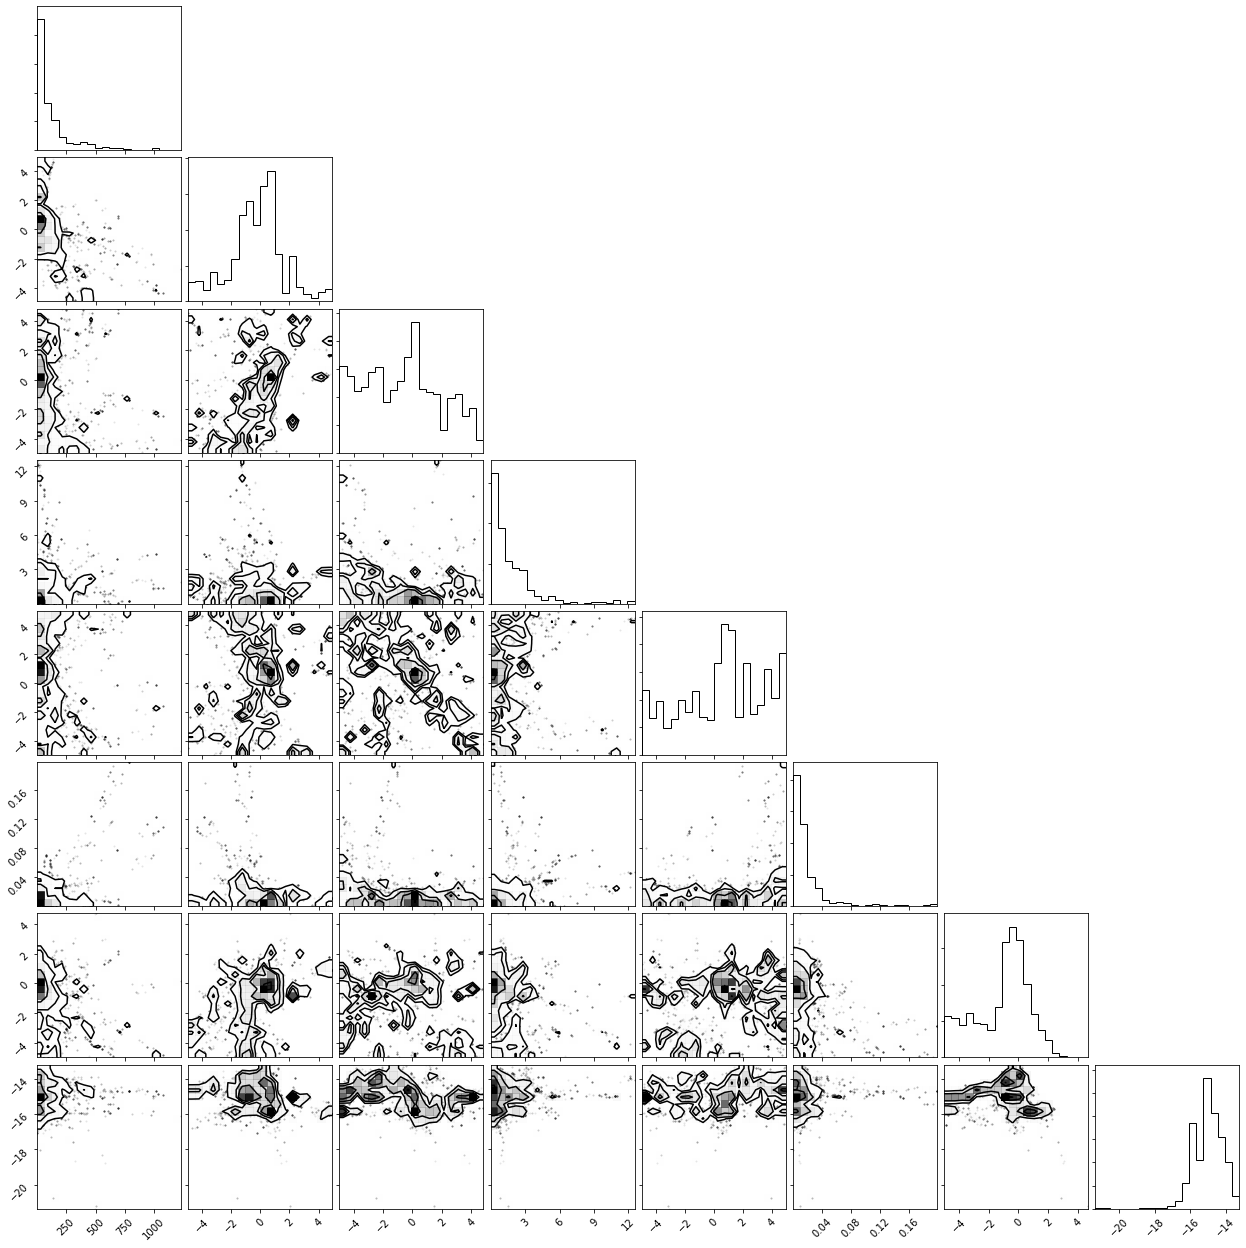

In [10]:
# TODO:
# take the log of  the  coefficients before corner plot
all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

corner.corner(all_samples)
plt.savefig("corner.pdf")

In [11]:
reader.accepted

array([39., 40., 35., 37., 36., 36., 42., 31., 37., 42., 13., 35., 35.,
       38., 41., 26., 41., 28., 34., 32., 34., 34., 19., 46., 46., 40.,
       38., 42., 37., 45.])

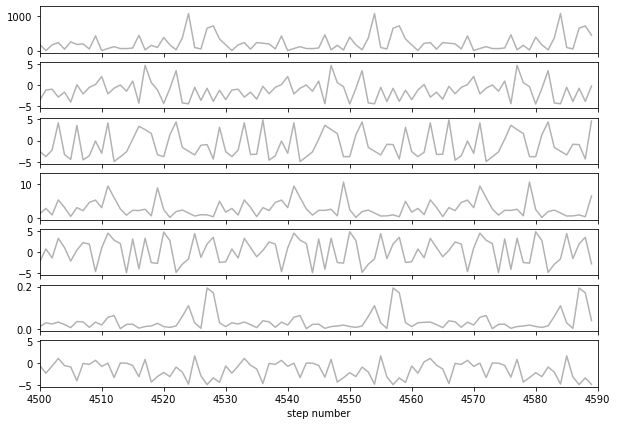

In [16]:
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, i], "k", alpha=0.3)
    ax.set_xlim(4500, len(samples))
    # ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [17]:
run_folder = ...
blobs = sorted(Path(run_folder).glob('run_*.pickle'))

for filename in blobs:
    with open(filename, 'rb') as  fn:
        out = pickle.load(fn)
        print(out)

TypeError: expected str, bytes or os.PathLike object, not ellipsis